In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd

In [10]:
Data = pd.read_csv("/content/drive/MyDrive/Datasets/melb_data.csv")
Data.dropna(axis=0,subset=['Price'],inplace=True)
Y = Data.Price
Data.drop(["Price"],axis=1,inplace=True)
numerical_cols = [cname for cname in Data.columns if Data[cname].dtype in ['float64','int64']]
Train_data = Data[numerical_cols].copy()

In [15]:
def get_Score(n_estimators):
  My_pipeline = Pipeline(
      steps = [
        ("Preprocessing",SimpleImputer()),
        ("Model",RandomForestRegressor(n_estimators))
      ]
  )
  scores = -1 * cross_val_score(My_pipeline,Train_data,Y,cv = 3,scoring="neg_mean_absolute_error")
  return scores.mean()



In [18]:
results = {}
for i in range(1,9):
  results[i*50] = get_Score(i*50)

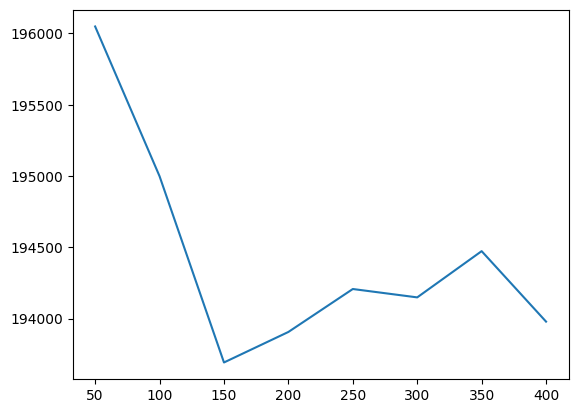

In [20]:
import matplotlib.pyplot as plt
plt.plot(list(results.keys()), list(results.values()))
plt.show()


In [ ]:
Final_pipeline = Pipeline(
    steps=[
        ("Preprocessing",SimpleImputer()),
        ("Model",RandomForestRegressor(n_estimators=150,random_state=0))
    ]
)
